 1 Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predict customer churn

**Customer churn** : Customer attrition (a.k.a customer churn) is one of the biggest expenditures of any organization. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

**Attempting to solve some of the key business challenges pertaining to customer attrition**  
what is the likelihood of an active customer leaving an organization? 
what are key indicators of a customer churn? 
what retention strategies can be implemented based on the results to diminish prospective customer churn?

1.   what is the likelihood of an active customer leaving an organization?
2.   what are key indicators of a customer churn?
3.  what retention strategies can be implemented based on the results to diminish prospective customer churn?












# importing Required libraries

In [ ]:
#importing  required libraries

#Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

#data Proccesing modules
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib



# Importing the dataset

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_churn_data.csv')

# knowing the dataset

In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


telecom customers are staying on average for 32 months and are paying $64 per month and starting salary is 18000 per month

In [ ]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

It seems no missing values present in the dataset

In [ ]:
#we are fnding unique values of payment methods and contract  then we can get to know monthly contract or years and what type of payment methods using

In [ ]:
print("No of uniqe values =",dataset["PaymentMethod"].nunique())
dataset["PaymentMethod"].unique()

No of uniqe values = 4


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
print("No of uniqe values =",dataset["Contract"].nunique())
dataset["Contract"].unique()

No of uniqe values = 3


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
#distribution of churn customers
dataset["Churn"].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

nearly 25% of cutomer attiration

# data wrangling

**Cleaning the data**

In [ ]:
#converting totalcharges to numeric and flot dtype
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
#finding the missing values and filling them with average
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [ ]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

**Label Encode Binary data:** Machine Learning algorithms can typically only have numerical values as their independent variables. Hence label encoding is quite pivotal as they encode categorical labels with appropriate numerical values. Here we are label encoding all categorical variables that have only two unique values.

categorical variable that has more than two unique values are dealt with Label Encoding and one-hot Encoding

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [ ]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


# Exploratory Data Analysis

In [ ]:
df_eda = dataset.copy()

In [ ]:
dataset2 = dataset[['gender', 
'SeniorCitizen', 'Partner','Dependents',
'tenure', 'PhoneService', 'PaperlessBilling',
'MonthlyCharges', 'TotalCharges']]

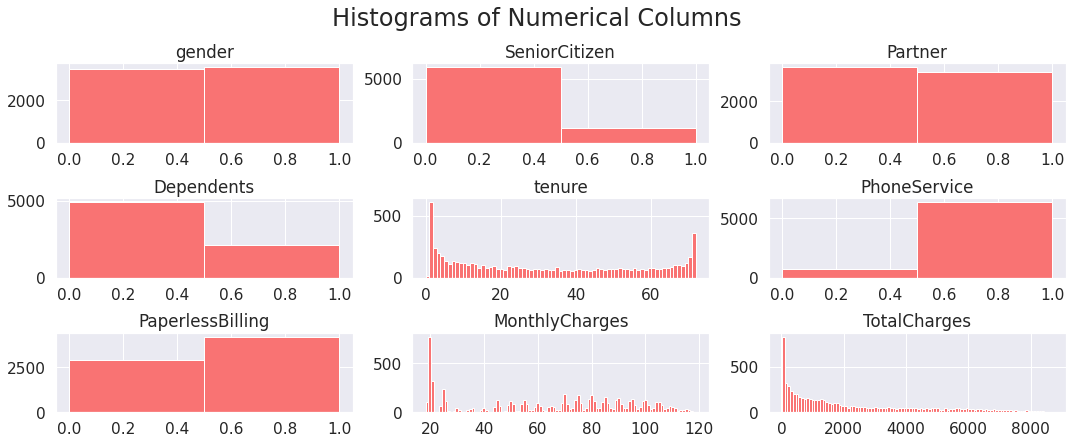

In [ ]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#f97373')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])



*   Almost half of the customers in our dataset are female whilst the other half are male.
*  Most of the customers in the dataset are younger people.


*  Not many customers seem to have dependents whilst almost half of the customers have a partner.
*   There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer segment that stays for more than 70 months on average.



*   Most of the customers seem to have phone service and 3/4th of them have opted for paperless Billing
*  Monthly charges span anywhere between 18  to 118 per customer with a huge proportion of customers on 20 segment.





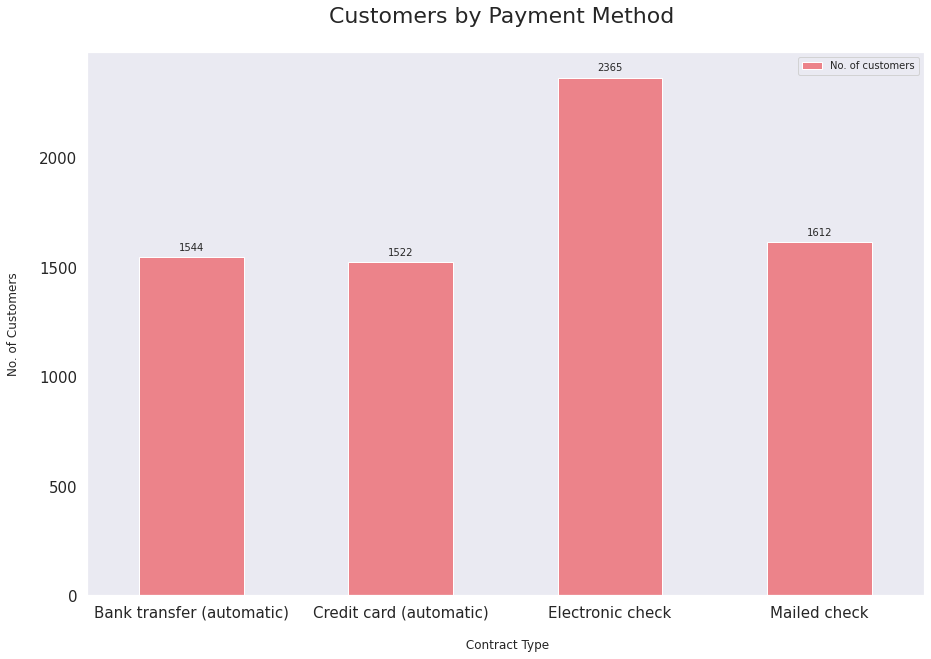

In [ ]:
payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)
ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec838a', fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(payment_method_split [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)
        ax.annotate(label,
        (x_value, y_value),         
        xytext=(0, space),textcoords="offset points", 
        ha='center',va=va)
add_value_labels(ax)


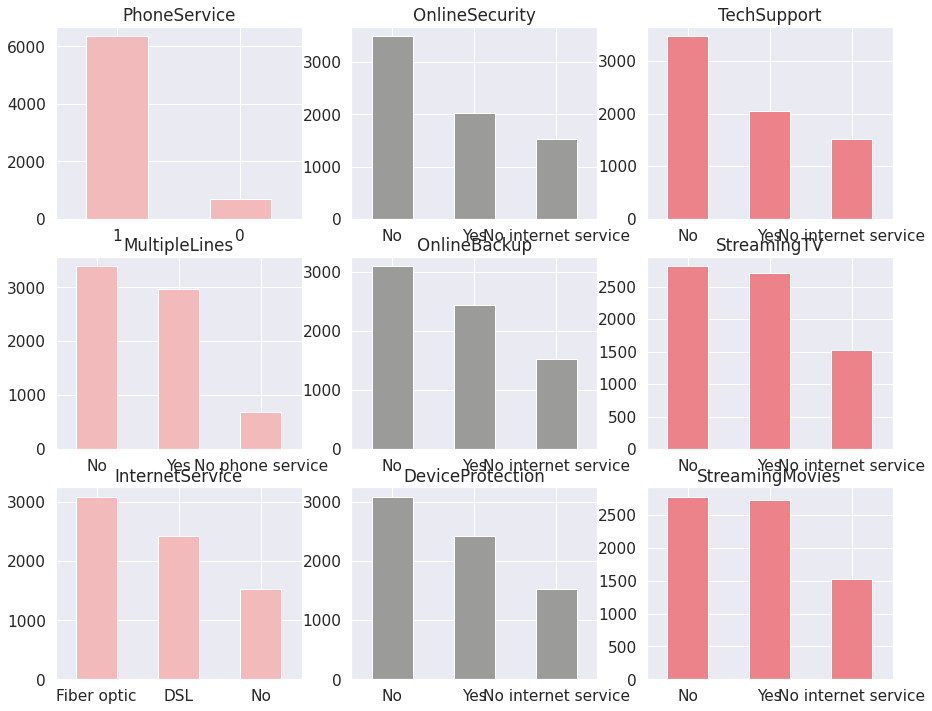

In [ ]:
services= ['PhoneService','MultipleLines',
'InternetService','OnlineSecurity',  'OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (15,12))
for i, item in enumerate(services):    
  if i < 3:
    ax = dataset[item].value_counts().plot(
    kind = 'bar',ax=axes[i,0],
    rot = 0, color ='#f3babc' )
        
  elif i >=3 and i < 6:
    ax = dataset[item].value_counts().plot(
    kind = 'bar',ax=axes[i-3,1],
    rot = 0,color ='#9b9c9a')
        
  elif i < 9:
    ax = dataset[item].value_counts().plot(
    kind = 'bar',ax=axes[i-6,2],rot = 0,
    color = '#ec838a')
  ax.set_title(item)



*       Most of the customers have phone service out of which almost half of the customers have multiple lines.
*   3/4th of the customers have opted for internet service via Fiber Optic and DSL connections with almost half of the internet users subscribing to streaming TV and movies.
*    Customers who have availed Online Backup, Device Protection, Technical Support and Online Security features are a minority.






**Analyzing Churn Rate using Categorical values**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


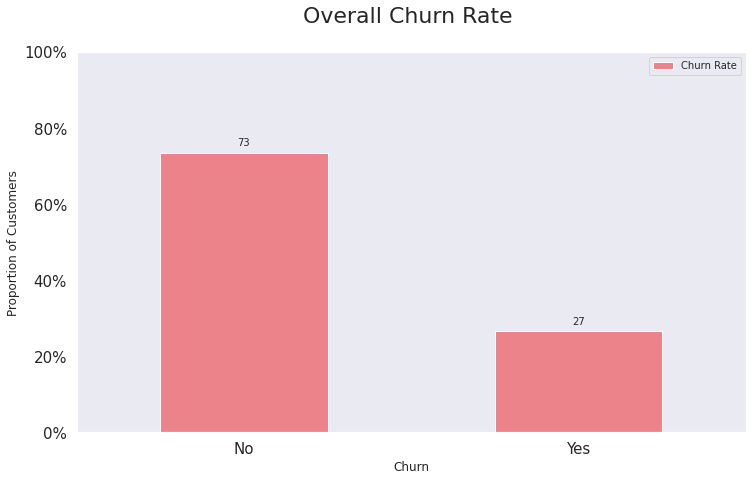

In [ ]:
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"]/ sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))
plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

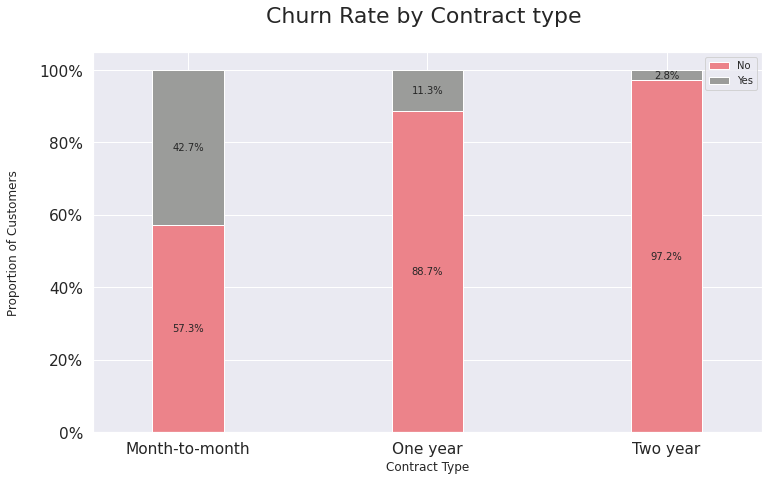

In [ ]:
contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)   




*   Customers with a prepaid or rather a month-to-month connection have a very high probability to churn compared to their peers on 1 or 2 years contracts.




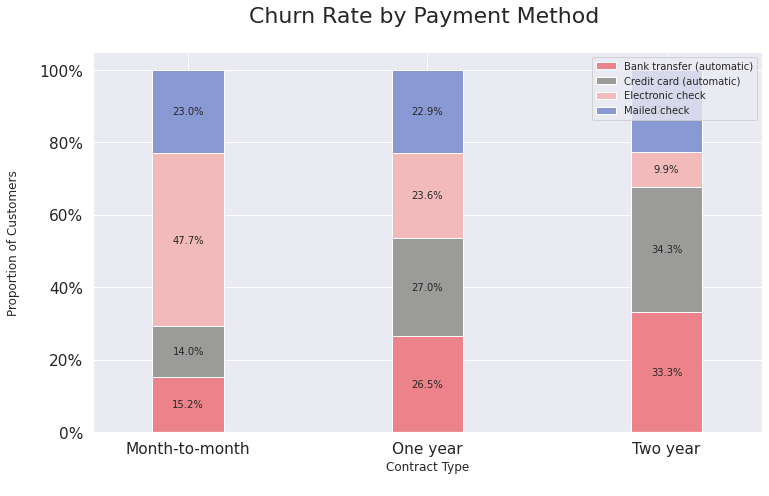

In [ ]:
 #Churn Rate by Payment Method Type

contract_churn = dataset.groupby(['Contract','PaymentMethod']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a', '#f3babc' ,'#8999d3', '#4d4f3c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False) 

*   Customers who pay via bank transfers seem to have the lowest churn rate among all the payment method segments.






In [ ]:
dataset2 = dataset[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199426
tenure         -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

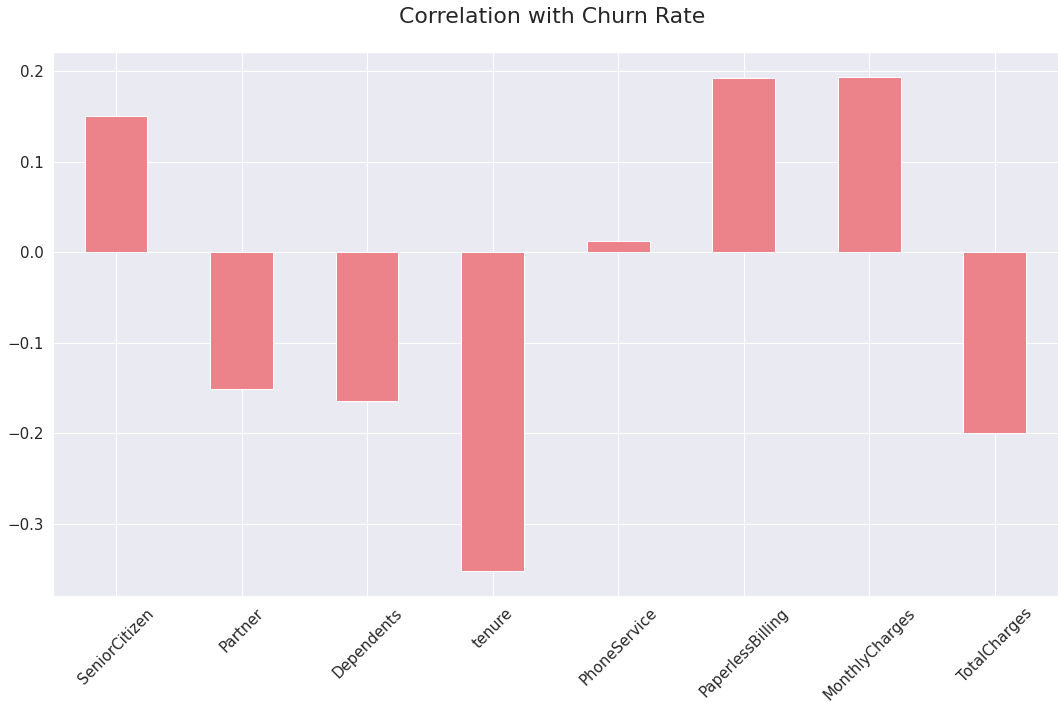

In [ ]:
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = '#ec838a',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")




*   the churn rate increases with monthly charges and age. 
*   In contrast Partner, Dependents and Tenure seem to be negatively related to churn.



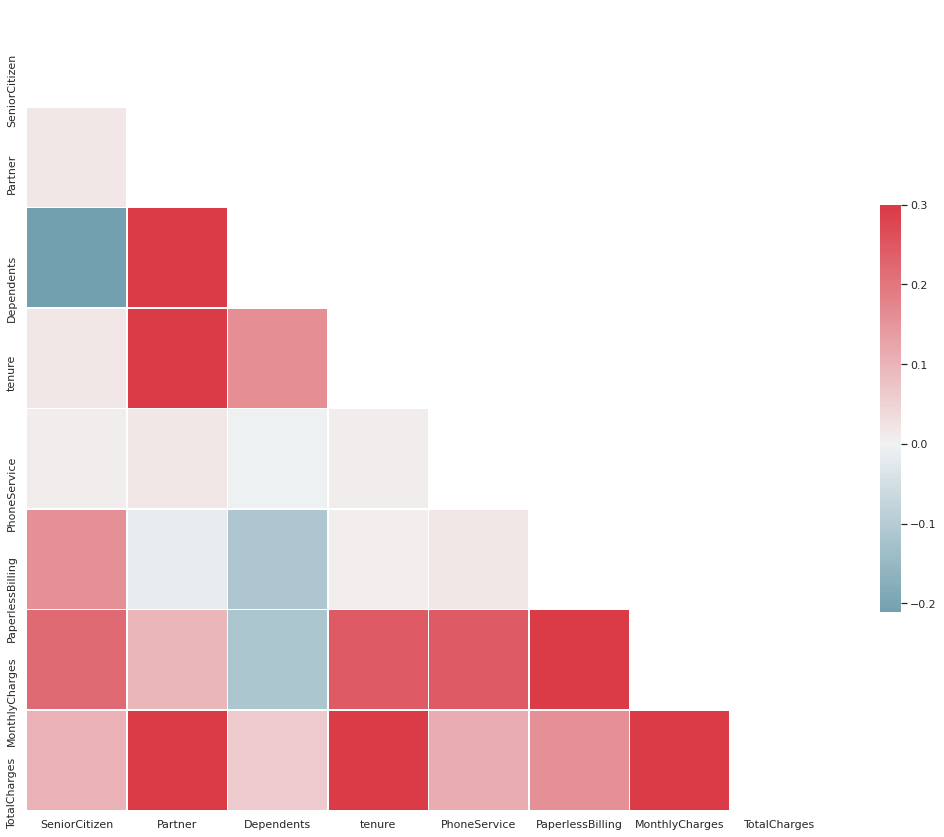

In [ ]:
#Plot Correlation Matrix of all independent variables------------------------

## Set and compute the Correlation Matrix
sns.set(style="white")
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure and a diverging colormap
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
 #Check Multicolinearity using VIF

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','TotalCharges']]

calc_vif(dataset2)

,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269



*   the ‘Monthly Charges’ and ‘Total Charges’ have a high VIF value.



Text(0.5, 1.0, 'Co-linearity of Monthly Charges and Total Charges \n')

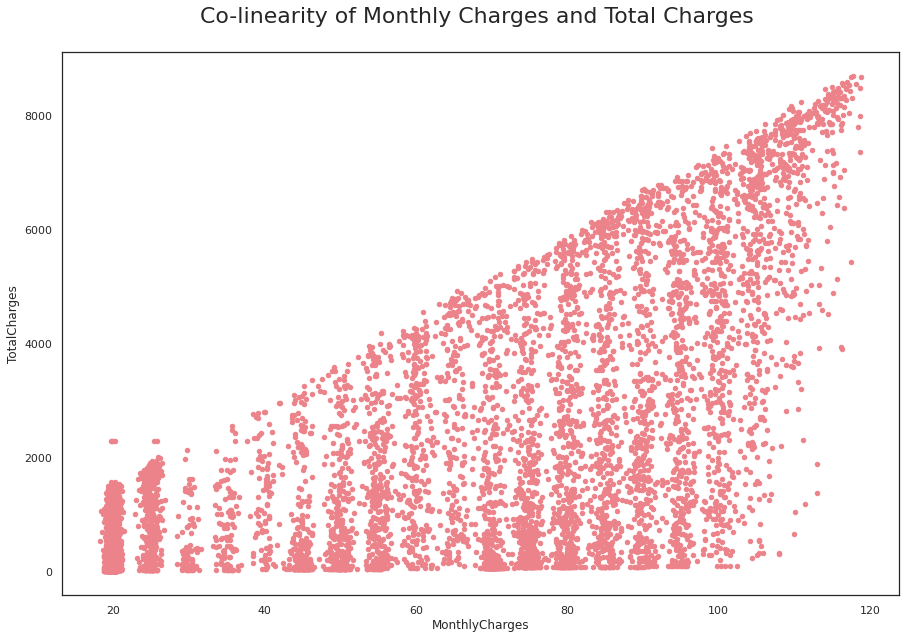

In [ ]:
#Total Charges seem to be colinear with Monthly Charges.

#check colinearity:
    
dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x = 'MonthlyCharges',
                                                              y='TotalCharges', color =  '#ec838a')


plt.title('Co-linearity of Monthly Charges and Total Charges \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")



In [ ]:
#Let’s try to drop one of the correlated features to see if it help us in bringing down the multicollinearity between correlated features:


In [ ]:
#dropping TotalCharges:
    
dataset2 = dataset2.drop(columns = "TotalCharges")

#Revalidate Colinearity:

dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

calc_vif(dataset2)

,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


After dropping the ‘Total Charges’ variable, VIF values for all the independent variables have decreased to a considerable extent.

**Key Findings from Exploratory Data Analysis :**

1.   The dataset does not have any missing or erroneous data values.
2.   Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with Partner, Dependents and Tenure.

1.   The dataset is imbalanced with the majority of customers being active.
2.   There is multicollinearity between Monthly Charges and Total Charges. Dropping Total Charges have decreased the VIF values considerably.

1.   Most of the customers in the dataset are younger people.
2.   There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s above 70 months old.

1.   Most of the customers seem to have phone service with Monthly charges spanning between $18 to $118 per customer.
2.   Customers with a month-to-month connection have a very high probability to churn that too if they have subscribed to pay via electronic checks.









In [ ]:
newdf=dataset.copy()

In [ ]:
newdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1


In [ ]:
#categorical variable that has more than two unique values have been dealt with Label Encoding and one-hot Encoding using get_dummies method


In [ ]:
newdf = newdf.drop(columns = "TotalCharges") 

In [ ]:
#Encode Categorical data

#Incase if user_id is an object:
    
identity = newdf["customerID"]
newdf= newdf.drop(columns="customerID")

# convert rest of categorical variable into dummy

newdf= pd.get_dummies(newdf)

#Rejoin userid to dataset (column concatenation)

newdf = pd.concat([newdf, identity], axis = 1)
 

In [ ]:
#Split dataset into dependent and independent variables

#identify response variable:
    
response = newdf["Churn"]

newdf = newdf.drop(columns="Churn")


In [ ]:
 #Generate training and test datasets of dependent and independent variables


X_train, X_test, y_train, y_test = train_test_split(newdf, response,
                                                    stratify=response, 
                                                    test_size = 0.2,
                                                    random_state = 0)



In [ ]:
#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (5634, 40)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 40)
Number transactions y_test dataset:  (1409,)


In [ ]:
#  Removing Identifiers
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])


In [ ]:
#  Feature Scaling
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

# Model Selection

In [ ]:

# Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics


models = []

models.append(('Logistic Regression', LogisticRegression (solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))


models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))


models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))


models.append(('Gaussian NB', GaussianNB()))


models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))


models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))



#Evaluating Model Results: 

    
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using k-fold cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=2)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.12,1.65,74.60,1.26
1,SVC,83.64,1.68,79.98,1.08
4,Gaussian NB,81.82,1.79,68.99,1.46
6,Random Forest,81.72,2.02,78.47,1.57
2,Kernel SVM,79.66,2.12,79.85,1.08
3,KNN,77.04,2.38,75.77,1.09
5,Decision Tree Classifier,65.44,1.67,72.75,1.45


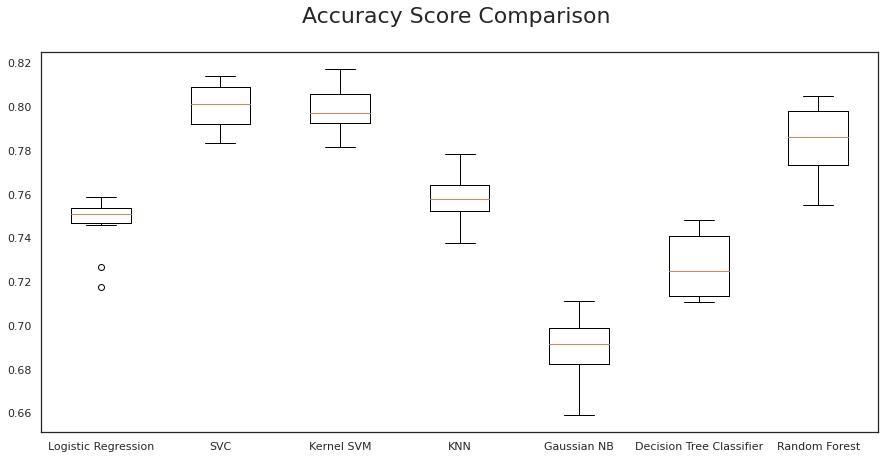

In [ ]:
 #Visualize Classification Algorithms Accuracy Comparisons

  
#Using Accuracy Mean:
    
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)



#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()




* From the first iteration of baseline classification algorithms we can see that Logistic Regression and SVC have outperformed the other five models for the chosen dataset with the highest mean AUC Scores




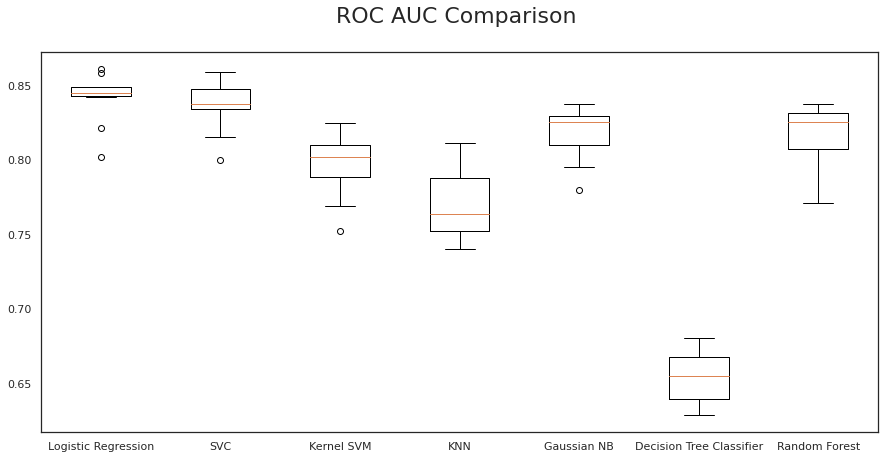

In [ ]:
#using Area under ROC Curve:

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)


#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()



 Before doing the second iteration, let’s optimize the parameters and finalize the evaluation metrics for model selection.

  In the first iteration, we assumed that K = 3, but in reality, we don’t know what is the optimal K value that gives maximum accuracy for the chosen training dataset. Therefore, let us write a for loop that iterates 20 to 30 times and gives the accuracy at each iteration so as to figure out the optimal number of K neighbors for the KNN Model.

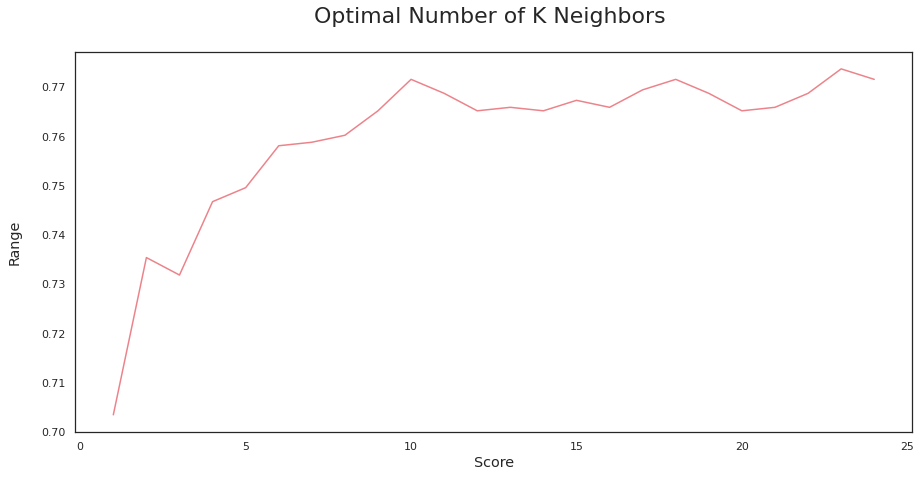

In [ ]:
#Identify optimal number of K neighbors for KNN Model:


score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

#optimal number of K neigbors = 22

from the above iterations, if we use K = 22, then we will get the maximum score of 78%.

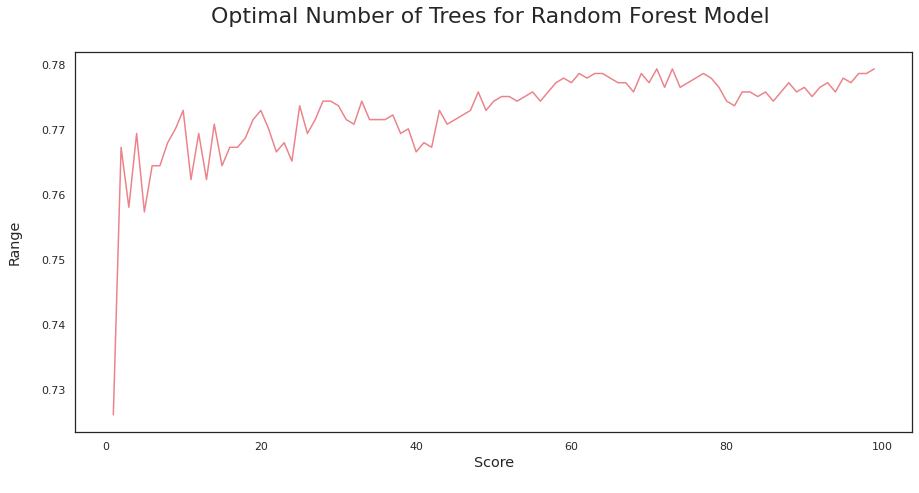

In [ ]:
#Identify optimal number of trees for Random Forest Model:
 
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')


plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()
 
 
#Optimal number of decision trees = 72

In [ ]:
#Compare Baseline Classification Algorithms - Second Iteration
 #we would be using the optimised parameters for KNN and Random Forest models.

In [ ]:
# Logistic Regression-----------------

# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])



#Step 15.4.2. . Support Vector Machine (linear classifier)------------------------


# Fitting SVM (SVC class) to the Training set:

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Step 15.4.3. K-Nearest Neighbours------------------------


# Fitting KNN to the Training set:

classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)



#Step 15.4.4.  Kernel SVM------------------------

# Fitting Kernel SVM to the Training set:

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Step 15.4.5.  Naive Byes------------------------------------------------

# Fitting Naive Byes to the Training set:
    
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)



#Step 15.4.6. Decision Tree---------------------------------------------


# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Step 15.4.7. Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


In [ ]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.803407   0.652038  0.556150  0.600289  0.573003
1          SVM (Linear)  0.803407   0.650155  0.561497  0.602582  0.577240
3            Kernel SVM  0.791341   0.637931  0.494652  0.557229  0.517917
6         Random Forest  0.779276   0.617100  0.443850  0.516330  0.470255
2  K-Nearest Neighbours  0.768630   0.570175  0.521390  0.544693  0.530468
5         Decision Tree  0.739532   0.508997  0.529412  0.519004  0.525199
4            Naive Byes  0.703336   0.467359  0.842246  0.601145  0.725806


we can  conclude that logistic regression is an optimal model of choice for the given dataset as it has relatively the highest combination of precision, recall and F2 scores

# Model Evaluation

**Logistic Regression**

In [ ]:
# Train & evaluate Logistic Regression
    
# Fit Logistic Regression on the Training dataset:
    
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)


                 Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  Logistic Regression  0.803407   0.652038  0.55615  0.600289  0.573003


In [ ]:
# Re-check k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


Logistic Regression Classifier Accuracy: 0.80 (+/- 0.04)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

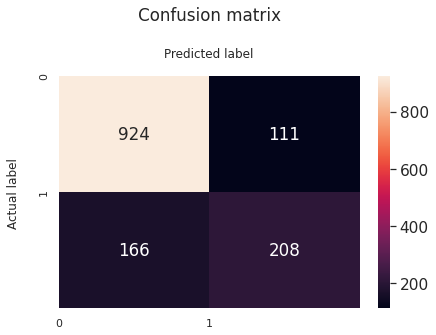

In [ ]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

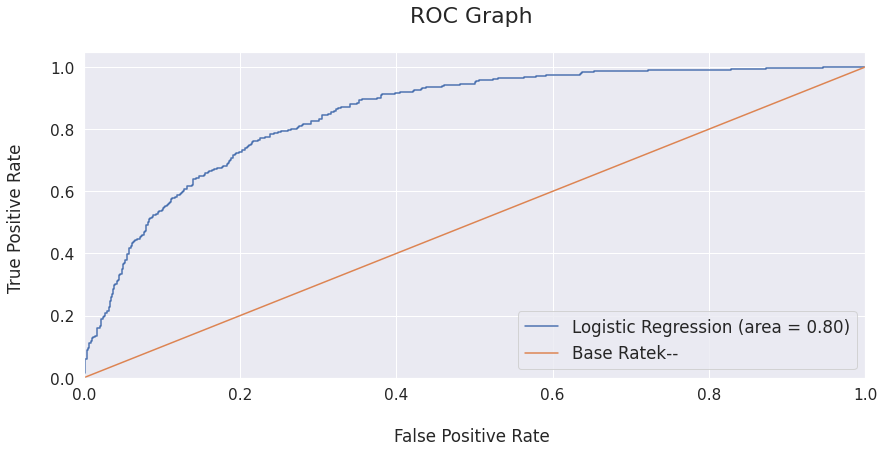

In [ ]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()


**Predict Feature Importance:** Logistic Regression allows us to determine the key features that have significance in predicting the target attribute “Churn” .

In [ ]:
#Step 17:Predict Feature Importance------------------------------------------------------
 

# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
12,StreamingTV,0.326867
32,NaN,0.309004
6,MultipleLines,0.165872
28,NaN,0.134275
31,NaN,0.131698
14,Contract,0.118931
37,NaN,0.113855
23,NaN,0.095824
10,DeviceProtection,0.090564
1,SeniorCitizen,0.079220


# Model Improvement (Logistic Regression)

In [ ]:
#Step 18:Hyper parameter Tuning  --------------------------------------


# Round 1: -----------------------------------------------------------------
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)


Took 3.75 seconds


(0.7190694189796186, {'C': 10, 'penalty': 'l2'})

In [ ]:
# Round 2: -----------------------------------------------------------------
    

# Select Regularization Method
import time
penalty = ['l2']

# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)


Took 1.34 seconds


(0.7187968786541289, {'C': 0.05, 'penalty': 'l2'})

In [ ]:
#Final Hyper parameter tuning and selection 


lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1] 

In [ ]:
# Comparing Model Predictions against test set

In [ ]:
#Revalidate final results with Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
print (cm)

[[924 111]
 [166 208]]


In [ ]:
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,157,50
1,61,19


Test Data Accuracy: 0.8034


<Figure size 2016x1440 with 0 Axes>

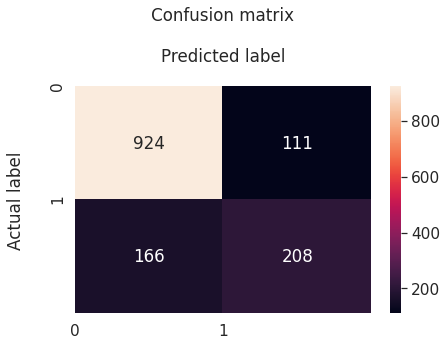

In [ ]:
#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



In [ ]:
#  Format Final Results:-------------------------------------------------------


final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

final_results["propensity_to_convert(%)"] = y_pred_probs 

final_results["propensity_to_convert(%)"] = final_results["propensity_to_convert(%)"]*100

final_results["propensity_to_convert(%)"]=final_results["propensity_to_convert(%)"].round(2)

final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_convert(%)']]

final_results ['Ranking'] = pd.qcut(final_results['propensity_to_convert(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

print (final_results)

      customerID  Churn  predictions  propensity_to_convert(%) Ranking
5532  8174-LNWMW      0            0                      1.94       9
5173  2480-SQIOB      0            0                     33.65       4
7010  0723-DRCLG      1            1                     79.61       1
6507  5708-EVONK      1            0                     18.62       5
5985  3585-YNADK      0            0                      4.15       8
...          ...    ...          ...                       ...     ...
3333  4573-JKNAE      0            0                      3.14       9
3053  0960-HUWBM      0            0                      6.46       7
6920  2595-KIWPV      0            0                      1.78       9
4696  9128-CPXKI      0            0                      9.64       7
2246  7181-BQYBV      1            1                     74.84       1

[1409 rows x 5 columns]


In [ ]:
# Save the model-------------------------------------------------------------------

filename = 'final_model.model'
i = [lr_classifier]
joblib.dump(i,filename)

['final_model.model']

Use of a customer churn dataset  to build a machine learning classifier that predicts the propensity of any customer to churn in months to come with a reasonable accuracy score of 76% to 84%.